In [737]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Viraj Patil
- PRN : 230940128038


# Deep Neural Networks

## Assignment 06
### Neural Network with :

Changes for the Assignment:

- **FIFA Dataset**
- One hidden layer 
- **multi-class**
- ADAM
- Mini Batch
- L2 regularization
- ${Swish}$ Activation function

In [738]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [739]:
###----------------
### Some parameters
###----------------

inpDir = '../../input'
outDir = '../output'
subDir = 'fifa_2019'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 10001 # number of epochs
ALPHA = 0.01 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate 
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

## Generate Data Set
FIFA 2019 Dataset

In [741]:
data_df = pd.read_csv('fifa_2019.csv')
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [742]:
for col in data_df.columns:
    print (f'{col} : {data_df[col].unique()}')

Unnamed: 0 : [    0     1     2 ... 18204 18205 18206]
ID : [158023  20801 190871 ... 241638 246268 246269]
Name : ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age : [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo : ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality : ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' '

In [743]:
data_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [744]:
data_df = data_df [data_df['Position'].notnull()]
data_df.shape

(18147, 89)

In [745]:
data_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [746]:
rel_columns = ['Position','Finishing',  'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

"""['Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', ,
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       , ,  'Release Clause']"""

"['Name', 'Age', 'Photo', 'Nationality', 'Flag',\n       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',\n       'Preferred Foot', 'International Reputation', 'Weak Foot',\n       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', ,\n       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',\n       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',\n       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',\n       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',\n       , ,  'Release Clause']"

In [747]:
data_df = data_df[rel_columns]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [748]:
data_df.isna().sum()

Position           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [749]:
data_df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [750]:
goalkeeper = 'GK'

forward = [ 'ST', 'LW', 'RW', 'LF', 'RF', 'RS', 'LS', 'CF']
midfielders = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defence = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB',  'RB']

In [751]:
data_df.loc[data_df['Position'] == 'GK' ,          'Position'] = 0

data_df.loc[data_df['Position'].isin(defence) ,    'Position'] = 1

data_df.loc[data_df['Position'].isin(midfielders), 'Position'] = 2

data_df.loc[data_df['Position'].isin(forward) ,    'Position'] = 3

data_df['Position'] =pd.to_numeric(data_df['Position'], downcast='integer')

In [752]:
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [753]:
data_df['Position'].unique()

array([3, 0, 2, 1], dtype=int8)

In [754]:
labels = { 0 : 'Goal Keepers', 1: 'Defence', 2: 'Mid-fielders', 3: 'Forward'}

In [755]:
features_df = data_df.drop('Position', axis = 1) # drop label col

label_df = data_df['Position'] # labels

features_df.shape, label_df.shape

((18147, 33), (18147,))

In [756]:
label_df = pd.get_dummies(label_df)
label_df.shape

(18147, 4)

In [757]:
label_df.head()

,0,1,2,3
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False


In [758]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, 
                                                    stratify=label_df,
                                                    train_size=14464, 
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14464, 33) (14464, 4) (3683, 33) (3683, 4)


In [759]:
scaler = StandardScaler() # get the scaler

X_train = scaler.fit_transform(X_train) # train
X_test = scaler.transform(X_test) # test

y_train = y_train.to_numpy() # array
y_test = y_test.to_numpy() # convert to array

In [760]:
y_train

array([[False,  True, False, False],
       [False,  True, False, False],
       [False, False, False,  True],
       ...,
       [False, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

## Activation Functions

### Softmax Function
Activation function to work with multi-class problems

$\sigma(z_i) = \dfrac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$


In [761]:
def fn_softmax(z : np.ndarray) -> np.ndarray:
    '''
        Args:
           z : array, Aggregated values 
       Return:
           probs. of each class
    '''
    
    exp_sc = np.exp(z)
    
    return exp_sc / np.sum( exp_sc, axis = 1, keepdims= True)    

In [762]:
sm = fn_softmax(np.asarray([[8, 5, 0], [-10, 0., 10]]))
print (sm, '\n\nTotal of all values', sm.sum(axis = 1))

[[9.52269826e-01 4.74107229e-02 3.19450938e-04]
 [2.06106005e-09 4.53978686e-05 9.99954600e-01]] 

Total of all values [1. 1.]


### Swish Activation Function

In [763]:
def fn_sigmoid(z):
    return (1/(1+np.exp(-z)))

In [764]:
# Swish Activation Function
def fn_activ(z):
    return z * fn_sigmoid(z)

def fn_activ_prime(z):
    dz = 1e-6 
    dj = fn_activ ( z + dz ) - fn_activ ( z - dz )
    return dj / (2 * dz)

## ADAM Optimizer

In [765]:
# implementaion of Adam Optimizer
def adam_optimizer( dW, m_t, v_t, t,
                   alpha = ALPHA, beta1=0.9, beta2=0.999, eps=1e-8):
    
    '''
    Args:
        dW: weight gradient
        m_t: first momentum
        v_t: second momentum
        t: time step,
    '''
    
    t+=1

    # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
    m_t= beta1 * m_t + (1.0 - beta1) * dW

    # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
    v_t = beta2 * v_t + (1.0 - beta2) * dW**2

    # m_cap(t) = m(t) / (1 - beta1(t))
    m_cap = m_t / (1.0 - beta1**(t))

    # vhat(t) = v(t) / (1 - beta2(t))
    v_cap = v_t / (1.0 - beta2**(t))

    # ( alpha * m_cap ) / ( np.sqrt( v_cap ) + epsilon )    #updates the parameters
    return  alpha * m_cap / (np.sqrt(v_cap) + eps)
        
    
     

In [766]:
# function to evaluate the total loss on the dataset

def calculate_loss(model : dict, X: np.ndarray, y: np.ndarray, lambd) -> np.float64:
    '''
    Args:
        model: dictionay object containing weights and biases
        X: Feature Matrix
        y: Labels array
    Returns:
        Average loss
    '''
    
    # extract weights and biases from the model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # number of examples
    m = X.shape[0]
    
    # Forward propagation to calculate our predictions
    # Layer 1
    z1 = X.dot(W1) + b1
    
    # Activation
    a1 = fn_activ(z1)
    
    # Layer 2
    z2 = a1.dot(W2) + b2
    
    reg_l2 = (np.sum(np.square(W1)) + np.sum(np.square(W2))) * (lambd / (2 * m))

    # Softmax  Activation
    a2 = fn_softmax(z2)


    # Calculating the Categorical cross-entropy loss
    data_loss = -np.sum(y * np.log(a2))
    
    total_data_loss = data_loss + reg_l2

    return 1./m * total_data_loss

## Predict Function

For predictions, we will simply be using the forward propagation.

In [767]:
# Helper function to predict an output (0 or 1)

def predict(model : dict, X: np.ndarray) -> np.ndarray:
    '''
     Args:
         model
         X: input features
    Returns:
        Predictions against the instances
         
    '''
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation
    z1 = X.dot(W1) + b1
    
    a1 = fn_activ(z1)
    
    z2 = a1.dot(W2) + b2
    
    # Softmax Activation
    a2 = fn_softmax(z2)
    
    return np.argmax(a2, axis =1) # pick with one with highest probabilities

## Prepare Model:

In [768]:
num_examples, nn_input_dim = X_train.shape # training set size (rows and cols)
nn_output_dim = y_train.shape[1] # output layer dimensionality

# lists to facilitate plotting 
loss_hist = {}

In [769]:
X_train.shape[0]//64

226

In [770]:
def build_model(nn_hdim, X, y, X_ts, y_ts, epochs=EPOCHS, alpha=ALPHA, lambd=0.01) -> dict:
    m = X.shape[0]
    
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    m_t_W1 = np.zeros_like(W1)
    v_t_W1 = np.zeros_like(W1)
    
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    m_t_W2 = np.zeros_like(W2)
    v_t_W2 = np.zeros_like(W2)
    
    b1 = np.zeros((1, nn_hdim))
    m_t_b1 = np.zeros_like(b1)
    v_t_b1 = np.zeros_like(b1)
    
    b2 = np.zeros((1, nn_output_dim))
    m_t_b2 = np.zeros_like(b2)
    v_t_b2 = np.zeros_like(b2)
    
    curr_loss = 0
    loss = []
    t_loss = []
    acc = []
    t_acc = []
    epoch = []
    
    mini_batch_size = 64  # Set the size of the mini-batch
    num_batches = int(len(X) / mini_batch_size)
    
    for i in range(0, epochs):
        # Initialize the mini-batch counter
        mini_batch_counter = 0
        
        for j in range(num_batches):
            # Creating a mini-batch by slicing the training data
            X_mini = X[mini_batch_counter * mini_batch_size:(mini_batch_counter + 1) * mini_batch_size, :]
            y_mini = y[mini_batch_counter * mini_batch_size:(mini_batch_counter + 1) * mini_batch_size, :]
            
            # Forward propagation
            z1 = X_mini.dot(W1) + b1
            a1 = fn_activ(z1)
            
            z2 = a1.dot(W2) + b2
            a2 = fn_softmax(z2)
            
            # Backward propagation
            dz2 = a2 - y_mini
            dW2 = (a1.T).dot(dz2) + lambd * W2
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            dz1 = dz2.dot(W2.T) * fn_activ_prime(z1)
            dW1 = np.dot(X_mini.T, dz1) + lambd * W1
            db1 = np.sum(dz1, axis=0, keepdims=True)
            
            mini_batch_counter += 1
            
            t = i
            
            # Applying L2 regularization to the weights
            #W1 += (lambd / mini_batch_size) * W1
            #W2 += (lambd / mini_batch_size) * W2
            
            # Gradient descent parameter update
            W1 += - adam_optimizer(dW1, m_t_W1, v_t_W1, t) / m
            b1 += - adam_optimizer(db1, m_t_b1, v_t_b1, t) / m
            W2 += - adam_optimizer(dW2, m_t_W2, v_t_W2, t) / m
            b2 += - adam_optimizer(db2, m_t_b2, v_t_b2, t) / m
            
        # Model as a Dict object to be returned
        model = {
            'W1': W1,
            'b1': b1,
            'W2': W2,
            'b2': b2
        }
        
        if i % 100:
            curr_loss = calculate_loss(model, X, y, lambd)
            loss.append(curr_loss)
            
            #### Loss on test data
            curr_loss = calculate_loss(model, X_ts, y_ts, lambd)
            
            t_loss.append(curr_loss)
            
            epoch.append(i)
        
        # Print the loss.
        if i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, curr_loss))
    
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    loss_hist['t_loss'] = t_loss
    
    return model

In [771]:
X_train.shape

(14464, 33)

In [772]:
# Build a model with a 18-dimensional hidden layer
model = build_model(18, X_train, y_train, 
                    X_test, y_test, # test data in
                    epochs = EPOCHS, 
                    alpha = ALPHA)

Loss after iteration 0: 0.000000


Loss after iteration 1000: 0.385048
Loss after iteration 2000: 0.311986
Loss after iteration 3000: 0.298888
Loss after iteration 4000: 0.293586
Loss after iteration 5000: 0.290381
Loss after iteration 6000: 0.288481
Loss after iteration 7000: 0.287116
Loss after iteration 8000: 0.286111
Loss after iteration 9000: 0.285479
Loss after iteration 10000: 0.285076


In [773]:
loss_df = pd.DataFrame(loss_hist)

In [774]:
loss_df.head()

,epoch,loss,t_loss
0,1,1.358078,1.354970
1,2,1.356103,1.352981
2,3,1.354311,1.351174
3,4,1.352631,1.349482
4,5,1.351026,1.347865


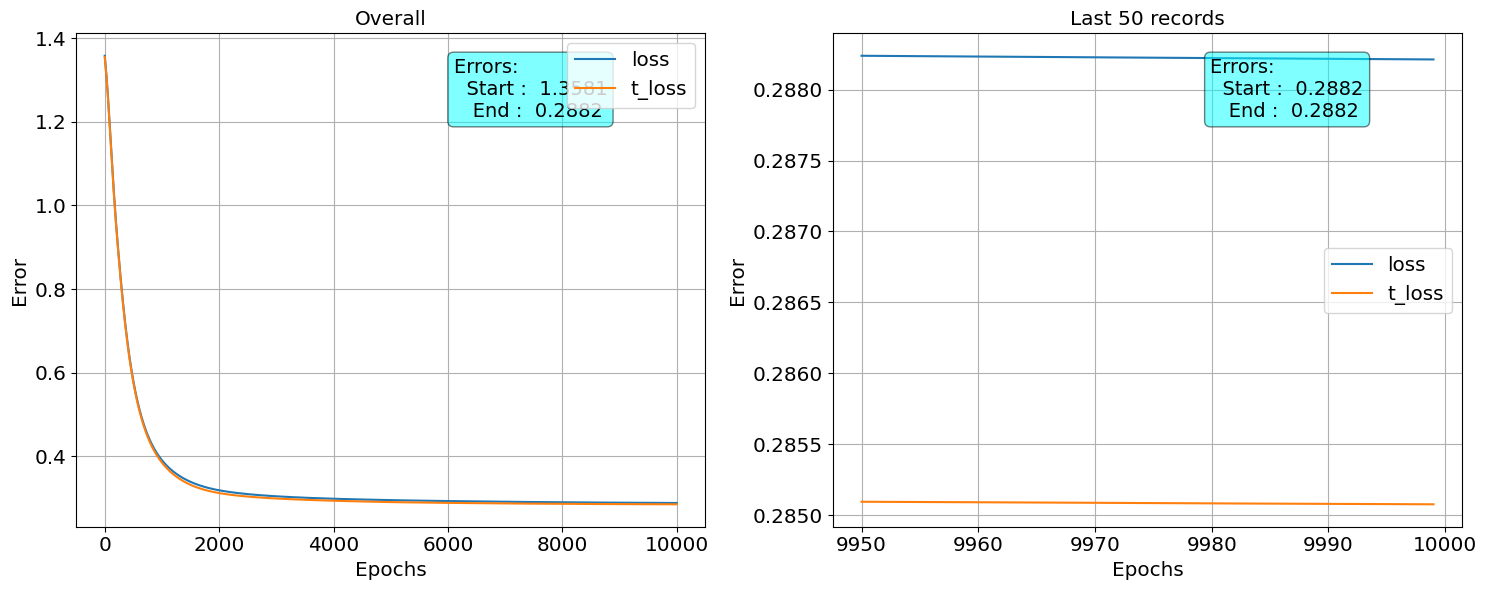

In [775]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]

loss_df.plot(x = 'epoch', y = ['loss', 't_loss'], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]

loss_df[-l_range:].plot(x = 'epoch', y = ['loss', 't_loss'], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[-l_range]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [776]:
loss_df[loss_df['t_loss'] == loss_df['t_loss'].min()]

,epoch,loss,t_loss
9899,9999,0.288213,0.285076


## Predictions
### Train Data

In [777]:
y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(np.argmax(y_train, axis =1), y_pred))

Accuracy score on Train Data : 0.8823976769911505


In [778]:
print(classification_report(np.argmax(y_train, axis =1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1614
           1       0.92      0.92      0.92      4676
           2       0.83      0.87      0.85      5450
           3       0.86      0.77      0.81      2724

    accuracy                           0.88     14464
   macro avg       0.90      0.89      0.90     14464
weighted avg       0.88      0.88      0.88     14464



### Test Data

In [779]:
y_pred = predict(model,X_test)

print('Accuracy score on Test Data :', accuracy_score(np.argmax(y_test, axis = 1), y_pred))

Accuracy score on Test Data : 0.8846049416236763


In [780]:
print(classification_report(np.argmax(y_test, axis = 1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.92      0.93      0.92      1190
           2       0.83      0.87      0.85      1388
           3       0.87      0.76      0.81       694

    accuracy                           0.88      3683
   macro avg       0.90      0.89      0.90      3683
weighted avg       0.89      0.88      0.88      3683



In [781]:
## Confusion Matrix helps

cm  = confusion_matrix(np.argmax(y_test, axis = 1), y_pred)
cm

array([[ 411,    0,    0,    0],
       [   0, 1106,   83,    1],
       [   0,   96, 1211,   81],
       [   0,    2,  162,  530]])

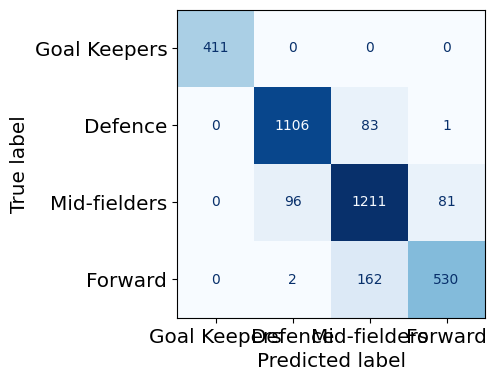

In [782]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = labels.values())

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();